In [1]:
import os
import progressbar as pb
from progressbar import ProgressBar, Percentage, Bar, ETA, FileTransferSpeed
import time

import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno

%matplotlib inline
pd.set_option("display.max_columns",80)
warnings.filterwarnings("ignore")

from IPython.display import HTML

In [2]:
traffic_column_names =['Recorded_Time','Received_Time','Serial_Number','Type','Subtype','Config_Version','Generated_Time',
               'Source_IP','Destination_IP','NAT_Source_IP','NAT_Destination_IP','Rule_Name','Source_User','Destination_User',
               'Application','Virtual_System','Source_Zone','Destination_Zone','Ingress_Interface','Egress_Interface',
               'Log_Forwarding_Profile','Future_Use','Session_ID','Repeat_Count','Source_Port','Destination_Port',
               'NAT_Source_Port','NAT_Destination_Port','Flags','Protocol','Action','Bytes','Bytes_sent','Bytes_received',
               'Packets','Start_Time','Elapsed_Time','Category','Future_Use_1','Sequence_Number','Action_flags','Source_Location',
               'Destination_Location', 'Future_Use_2', 'Packets Sent', 'Packets Received', 'Session End Reason','Drop_1','Drop_2',
               'Drop_3','Drop_4','Drop_5','device_name','From_Policy','a','b','c','d','e','f','g']

threat_column_names=['Recorded_Time','Received_Time','Serial_Number','Type','Subtype', 'Config_Version','Generated_Time',
                     'Source_IP','Destination_IP','NAT_Source_IP','NAT_Destination_IP','Rule_Name','Source_User','Destination_User',
                     'Application','Virtual_System','Source_Zone','Destination_Zone','Ingress_Interface','Egress_Interface', 
                     'Log_Forwarding_Profile','Future_Use','Session_ID','Repeat_Count','Source_Port','Destination_Port', 
                     'NAT_Source_Port','NAT_Destination_Port','Flags','Protocol','Action', 'Miscellaneous','Threat_ID', 
                     'Category', 'Severity', 'Direction','Sequence_Number', 'Action_Flags','Source_Location','Destination_Location',
                     'Drop_40','Drop_41','Drop_42','Drop_43','Drop_44','Something','Drop_46','Drop_47','Drop_48','Drop_49',
                     'Drop_50','Drop_51','Drop_52','Drop_53','Drop_54','Drop_55','Drop_56','Drop_57','Drop_58',
                     'device_name','Drop_60','Drop_61','Drop_62','Drop_63','Drop_64','Drop_65','Drop_66','Drop_67','Drop_68',
                     'Detailed_Subtype','Something_2','From_Policy']

In [3]:
def read_logs(rel_path,compression=None,extension=None,column_names=None):
    path = rel_path
    zip_files = [f for f in os.listdir(path) if f.endswith(extension)]
    paths = [path + x for x in zip_files]
    df=pd.DataFrame()
    for i in range(0,len(paths)):
        try:
            demo_df=pd.read_csv(paths[i],header=None,infer_datetime_format=True,low_memory=True,
                                compression=compression,error_bad_lines=False,warn_bad_lines=False,memory_map=True)
        except:
            print(i,paths[i],"\n")
            continue
        if demo_df.empty!=True:
            df=df.append(demo_df)
        else:
            print("Not empty")
    df.columns=column_names
    return df

In [4]:
root_paths=['../../data/2017-09-26/','../../data/2017-09-27/','../../data/2017-09-28/','../../data/2017-09-29/',
            '../../data/2017-09-30/','../../data/2017-10-01/','../../data/2017-10-02/','../../data/2017-10-03/',
            '../../data/2017-10-04/','../../data/2017-10-05/','../../data/2017-10-06/','../../data/2017-10-07/',
            '../../data/2017-10-08/','../../data/2017-10-09/','../../data/2017-10-10/']
threat_logs=pd.DataFrame()
for i in range(0,len(root_paths)):
    df2=(read_logs(root_paths[i],None,'Wireless-PA.csv',threat_column_names))
    threat_logs=pd.concat([threat_logs,df2])
threat_logs.Received_Time=pd.to_datetime(threat_logs.Received_Time)
threat_logs.sort_values(by='Received_Time',inplace=True)
threat_logs.dropna(inplace=True,subset=['Source_User'])
threat_logs.reset_index(inplace=True,drop=True)

In [5]:
threat_logs.drop(['Drop_40','Drop_41','Drop_42','Drop_43','Drop_44','Drop_46','Drop_47','Drop_48','Drop_49',
                 'Drop_50','Drop_51','Drop_52','Drop_53','Drop_54','Drop_55','Drop_56','Drop_57','Drop_58',
                 'Drop_60','Drop_61','Drop_62','Drop_63','Drop_64','Drop_65','Drop_65','Drop_66','Drop_67',
                 'Drop_68',
                 'NAT_Source_IP','NAT_Destination_IP','Rule_Name','Destination_User','Virtual_System',
                 'Log_Forwarding_Profile','NAT_Source_Port','NAT_Destination_Port','Action_Flags','From_Policy',
                 'Flags','Serial_Number','Config_Version','Source_Zone','Destination_Zone','Ingress_Interface',
                'Egress_Interface'],
                axis=1,inplace=True)

In [6]:
threat_logs.head(2)

,Recorded_Time,Received_Time,Type,Subtype,Generated_Time,Source_IP,Destination_IP,Source_User,Application,Future_Use,Session_ID,Repeat_Count,Source_Port,Destination_Port,Protocol,Action,Miscellaneous,Threat_ID,Category,Severity,Direction,Sequence_Number,Source_Location,Destination_Location,Something,device_name,Detailed_Subtype,Something_2
0,Sep 26 19:59:22 ptx-pan.net.umd.edu 1,2017-09-26 19:59:22,THREAT,spyware,2017/09/26 19:59:16,10.104.152.230,128.8.74.2,028d66b233501fa7283c352230fe049c858c466c17501a...,dns,2017/09/26 19:59:16,34759955.0,1.0,63265.0,53.0,udp,sinkhole,"""",Suspicious DNS Query (generic:rammichael.com)(...,any,medium,client-to-server,642299358.0,UMD Private Network,United States,0.0,css-wireless-pa1,dns,AppThreat-0-0
1,Sep 26 20:04:27 ptx-pan.net.umd.edu 1,2017-09-26 20:04:26,THREAT,spyware,2017/09/26 20:04:21,10.104.28.101,128.8.74.2,cfc79fc322e3f76c7c52fe3dd88af9b70bc41f9a9ab1a9...,dns,2017/09/26 20:04:21,68359997.0,1.0,21322.0,53.0,udp,sinkhole,"""",Suspicious DNS Query (generic:global.ymtrackin...,any,medium,client-to-server,642299505.0,UMD Private Network,United States,0.0,css-wireless-pa1,dns,AppThreat-0-0


In [7]:
print(threat_logs.describe())

         Session_ID  Repeat_Count   Source_Port  Destination_Port  \
count  4.451000e+03   4451.000000   4451.000000       4451.000000   
mean   3.634491e+07      5.575826  50726.637385        119.372501   
std    2.741745e+07     14.622187  14519.464601        506.639918   
min    9.700000e+01      1.000000    988.000000         22.000000   
25%    4.371615e+05      1.000000  50332.000000         53.000000   
50%    3.462411e+07      1.000000  55132.000000         80.000000   
75%    6.764102e+07      3.000000  59588.500000         80.000000   
max    6.894247e+07    119.000000  65524.000000      10006.000000   

       Sequence_Number    Something  
count     4.448000e+03  4447.000000  
mean      6.794826e+08     0.674612  
std       2.785475e+07     3.231235  
min       6.422994e+08     0.000000  
25%       6.426320e+08     0.000000  
50%       7.003774e+08     1.000000  
75%       7.005231e+08     1.000000  
max       7.007314e+08    85.000000  


In [8]:
print('The average repeat count is ',np.average(threat_logs.Repeat_Count.dropna()))
print("The average number of threats generated by a user ",len(threat_logs)/(threat_logs.Source_User.nunique()))
print("The most number of threats",threat_logs.Source_User.value_counts()[0], "are generated by user",threat_logs.Source_User.value_counts().index.get_values()[0])
print("Out of the",len(threat_logs[threat_logs.Severity=='critical']), "of critical threats",threat_logs[threat_logs.Severity=='critical'].Source_User.value_counts()[0],"are generated by user",threat_logs[threat_logs.Severity=='critical'].Source_User.value_counts().index.get_values()[0])
print("Out of the",len(threat_logs[threat_logs.Severity=='high']), "of high threats",threat_logs[threat_logs.Severity=='high'].Source_User.value_counts()[0],"are generated by user",threat_logs[threat_logs.Severity=='high'].Source_User.value_counts().index.get_values()[0])
print("Out of the",len(threat_logs[threat_logs.Severity=='medium']), "of medium threats",threat_logs[threat_logs.Severity=='medium'].Source_User.value_counts()[0],"are generated by user",threat_logs[threat_logs.Severity=='medium'].Source_User.value_counts().index.get_values()[0])
print("Out of the",len(threat_logs)," threats",threat_logs.Destination_IP.value_counts()[0]," have a destination IP of",threat_logs.Destination_IP.value_counts().index.get_values()[0])

The average repeat count is  5.57582565716
The average number of threats generated by a user  7.217179902755268
The most number of threats 669 are generated by user 07a805db92f77828144af02c110b4107381c8608ff69cbe8322b1619550dca26
Out of the 35 of critical threats 23 are generated by user 1510909c55f8994397a5aced5728fca609aff1b6bab31080e919795aeb2db97d
Out of the 710 of high threats 669 are generated by user 07a805db92f77828144af02c110b4107381c8608ff69cbe8322b1619550dca26
Out of the 3703 of medium threats 459 are generated by user e0027ef4773a01094339852b6b1207f38c22adbe46879a9faf490413b580caab
Out of the 4453  threats 1966  have a destination IP of 128.8.74.2


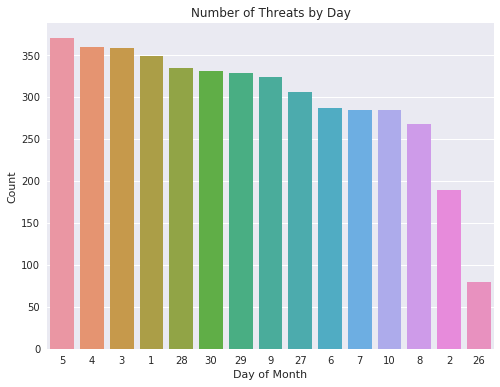

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x=threat_logs.Received_Time.dt.day,order=threat_logs.Received_Time.dt.day.value_counts().index)
plt.title("Number of Threats by Day")
plt.xlabel("Day of Month")
plt.ylabel("Count")
plt.show()

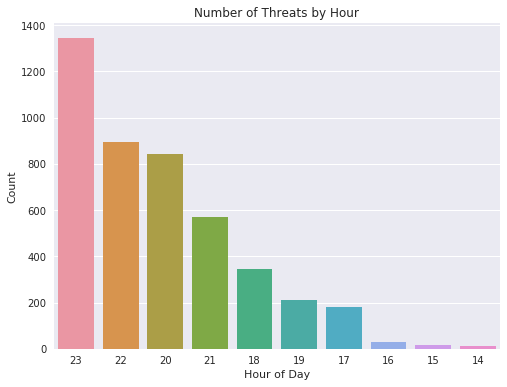

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x=threat_logs.Received_Time.dt.hour,order=threat_logs.Received_Time.dt.hour.value_counts().index)
plt.title("Number of Threats by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

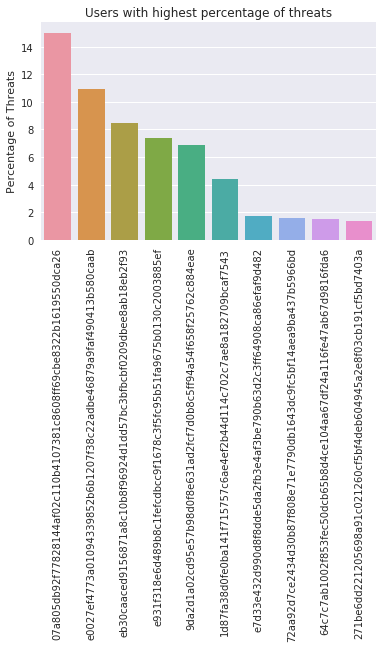

In [11]:
sns.barplot(y=(threat_logs.Source_User.value_counts()/len(threat_logs)*100)[0:10],
            x=np.array(threat_logs.Source_User.value_counts().index[0:10]))
plt.title("Users with highest percentage of threats")
plt.ylabel("Percentage of Threats")
plt.xticks(rotation=90) 
plt.show()

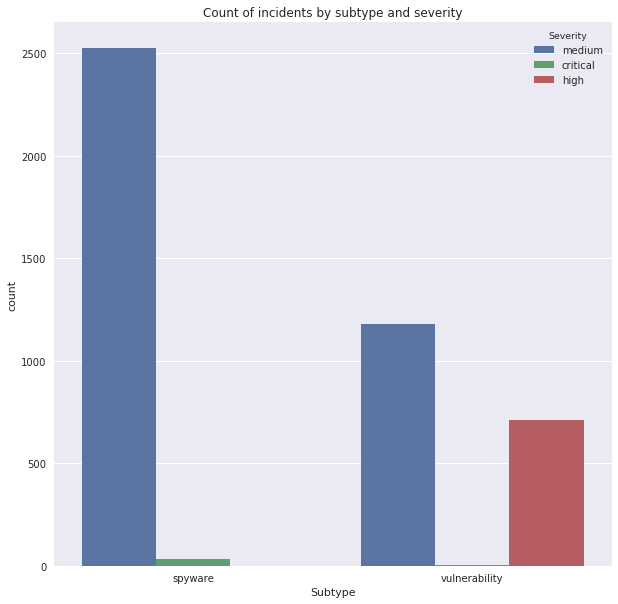

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(x=threat_logs.Subtype,hue=threat_logs['Severity'])
plt.title("Count of incidents by subtype and severity")
plt.show()

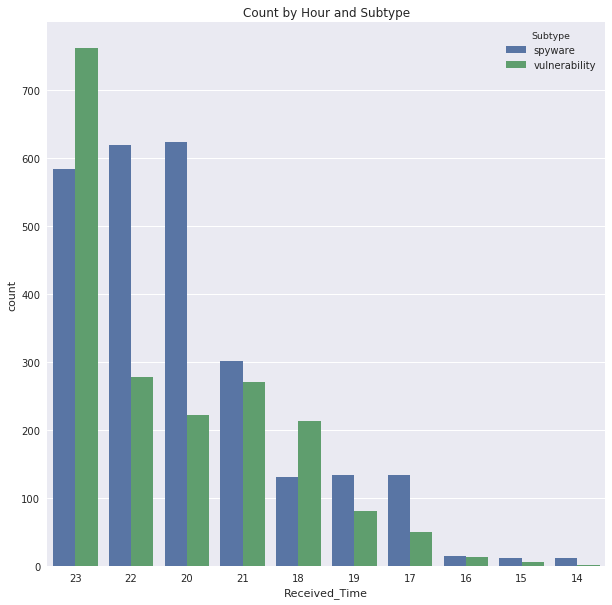

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(x=threat_logs.Received_Time.dt.hour,hue=threat_logs.Subtype,order=threat_logs.Received_Time.dt.hour.value_counts().index)
plt.title("Count by Hour and Subtype")
plt.show()

In [14]:
import plotly
import cufflinks as cf
import plotly.plotly as py
import plotly.graph_objs as go
cf.go_offline()
import plotly.tools as tls
import plotly.figure_factory as ff
# tls.set_credentials_file(username='darshan.bhansali', api_key='38zZ2TS4ob4feqV0bvR0')
# tls.set_credentials_file(username='darshan-b', api_key='KuC894mmVN7kBiZZyffO')
tls.set_credentials_file(username='darshan18', api_key='dhwPNrhtYUy2iMbQqALn')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


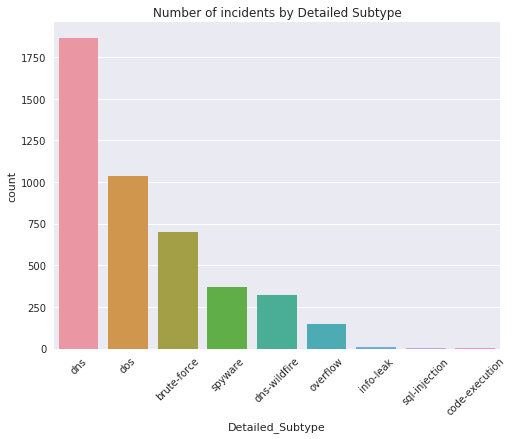

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x=threat_logs.Detailed_Subtype,order=threat_logs.Detailed_Subtype.value_counts().index)
plt.title("Number of incidents by Detailed Subtype")
plt.xticks(rotation=45)
plt.show()

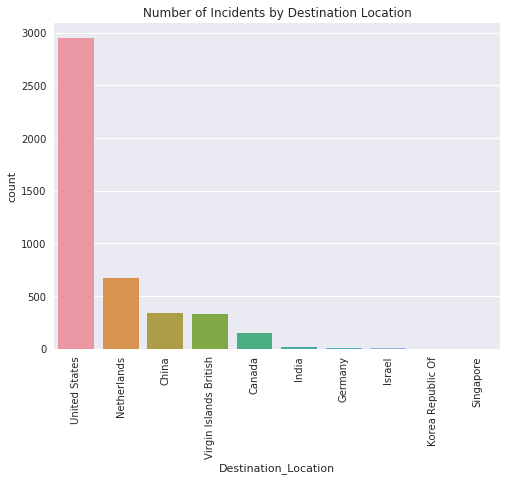

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x=threat_logs.Destination_Location,order=threat_logs.Destination_Location.value_counts().index)
plt.title("Number of Incidents by Destination Location")
plt.xticks(rotation=90)
plt.show()

In [18]:
colors = ['rgb(165,0,38)', 'rgb(215,48,39)', 'rgb(244,109,67)','rgb(253,174,97)','rgb(254,224,144)',
          'rgb(224,243,248)','rgb(171,217,233)','rgb(116,173,209)','rgb(69,117,180)', 'rgb(49,54,149)',
          'rgb(165,0,38)', 'rgb(215,48,39)', 'rgb(244,109,67)','rgb(253,174,97)']


trace1 = go.Bar(
    x=threat_logs.Severity.value_counts().index.get_values(),
    y=threat_logs.Severity.value_counts().values,
    name='Incident by Severity',
    marker=dict(color=colors)
)
layout=go.Layout(title='Count of Incidents by Severity',
                 xaxis=dict(title='Severity',tickangle=30),
                 yaxis=dict(title='Count'))
annotations = []

for i in range(0, 3):
    annotations.append(dict(x=threat_logs.Severity.value_counts().index.get_values()[i], y=threat_logs.Severity.value_counts().values[i]+0.8, 
                            text="%d" % threat_logs.Severity.value_counts().values[i],
                                  font=dict(family='Arial', size=10,
                                  color='rgba(0,0,0,1)'),
                                  showarrow=True,))
    layout['annotations'] = annotations

data=[trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='grouped-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~darshan18/0 or inside your plot.ly account where it is named 'grouped-bar'


In [19]:
colors = ['rgb(165,0,38)', 'rgb(215,48,39)', 'rgb(244,109,67)','rgb(253,174,97)','rgb(254,224,144)',
          'rgb(224,243,248)','rgb(171,217,233)','rgb(116,173,209)','rgb(69,117,180)', 'rgb(49,54,149)',
          'rgb(165,0,38)', 'rgb(215,48,39)', 'rgb(244,109,67)','rgb(253,174,97)']


trace1 = go.Bar(
    x=threat_logs.Detailed_Subtype.value_counts().index.get_values(),
    y=threat_logs.Detailed_Subtype.value_counts().values,
    name='Incident by Severity',
    marker=dict(color=colors)
)
layout=go.Layout(title='Count of Incidents by Detailed Subtype',
                 xaxis=dict(title='Detailed Subtype',tickangle=30),
                 yaxis=dict(title='Count'))
annotations = []

for i in range(0, len(threat_logs.Detailed_Subtype.value_counts().values)):
    annotations.append(dict(x=threat_logs.Detailed_Subtype.value_counts().index.get_values()[i], y=threat_logs.Detailed_Subtype.value_counts().values[i]+0.8, 
                            text="%d" % threat_logs.Detailed_Subtype.value_counts().values[i],
                                  font=dict(family='Arial', size=10,
                                  color='rgba(0,0,0,1)'),
                                  showarrow=True,))
    layout['annotations'] = annotations

data=[trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='grouped-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~darshan18/0 or inside your plot.ly account where it is named 'grouped-bar'


In [20]:
colors = ['rgb(165,0,38)', 'rgb(215,48,39)', 'rgb(244,109,67)','rgb(253,174,97)','rgb(254,224,144)',
          'rgb(224,243,248)','rgb(171,217,233)','rgb(116,173,209)','rgb(69,117,180)', 'rgb(49,54,149)',
          'rgb(165,0,38)', 'rgb(215,48,39)', 'rgb(244,109,67)','rgb(253,174,97)']


trace1 = go.Bar(
    x=threat_logs.Destination_Location.value_counts().index.get_values(),
    y=threat_logs.Destination_Location.value_counts().values,
    name='Incident by Severity',
    marker=dict(color=colors)
)
layout=go.Layout(title='Count of Incidents by Destination_Location',
                 xaxis=dict(title='Destination_Location',tickangle=30),
                 yaxis=dict(title='Count'))
annotations = []

for i in range(0, len(threat_logs.Destination_Location.value_counts().values)):
    annotations.append(dict(x=threat_logs.Destination_Location.value_counts().index.get_values()[i], y=threat_logs.Destination_Location.value_counts().values[i]+0.8, 
                            text="%d" % threat_logs.Destination_Location.value_counts().values[i],
                                  font=dict(family='Arial', size=10,
                                  color='rgba(0,0,0,1)'),
                                  showarrow=True,))
    layout['annotations'] = annotations

data=[trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='grouped-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~darshan18/0 or inside your plot.ly account where it is named 'grouped-bar'


In [21]:
data = [go.Histogram(x=threat_logs.Repeat_Count,histnorm='probability')]

layout=go.Layout(title='Histogram of Repeat Counts',
                 xaxis=dict(title='Number of Repeat Counts',tickangle=30),
                 yaxis=dict(title='Probability'))

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='grouped-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~darshan18/0 or inside your plot.ly account where it is named 'grouped-bar'


In [22]:
hist_data = [threat_logs.Received_Time.dt.hour]


colors = ['rgb(0, 0, 100)']
group_labels=['distplot']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data,group_labels,bin_size=1, colors=colors,show_hist=False)

fig['layout'].update(title='Customized Distplot')

# Plot!
py.iplot(fig, filename='Distplot Colors')

In [23]:
a=threat_logs.groupby(threat_logs.Received_Time.dt.date).count()['Detailed_Subtype']
df2=pd.DataFrame(a)
trace = go.Scatter(x=df2.index,y=df2.Detailed_Subtype)

data = [trace]

high_annotations=[dict(x=df2.Detailed_Subtype.idxmax(), y=df2.Detailed_Subtype.max(),
                       xref='x', yref='y',
                       text='Maximum number of Threats detected on '+str(df2.Detailed_Subtype.idxmax()).split()[0]
                       +"<br>"+str(df2.Detailed_Subtype.max()), ax=0, ay=-40)]
low_annotations=[dict(x=df2.Detailed_Subtype.idxmin(),y=df2.Detailed_Subtype.min(),xref='x',yref='y',
                      text='Minimum number of Threats detected on '+str(df2.Detailed_Subtype.idxmin()).split()[0]+"<br>"+str(df2.Detailed_Subtype.min()), ax=20, ay=37)]                

updatemenus = list([
        dict(type="buttons",active=1,
             buttons=list([
                    dict(label = 'All',method = 'update',args = [{'visible': [True,True]},{'title': 'Threats per day','annotations':high_annotations+low_annotations }]),
                    dict(label = 'Maximum',method = 'update',args = [{'visible': [True,False]},{'title': ' Maximum Threats per day','annotations':high_annotations }]),
                    dict(label = 'Minimum',method = 'update',args = [{'visible': [True,True]},{'title': ' Minimum Threats per day','annotations':low_annotations }])
                ]),
    )]
                  
)

layout = dict(
    title='Time Series Plot',
    xaxis=dict(
        range=['2017-09-26','2017-10-10'],
        rangeslider=dict(),
        type='date'
    ),
    updatemenus=updatemenus
    
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Threats")

In [24]:
a=threat_logs.groupby(threat_logs.Received_Time.dt.hour).count()['Detailed_Subtype']
df2=pd.DataFrame(a)

trace = go.Scatter(x=df2.index,y=df2.Detailed_Subtype)

data = [trace]

high_annotations=[dict(x=df2.Detailed_Subtype.idxmax(), y=df2.Detailed_Subtype.max(),
                       xref='x', yref='y',
                       text='Maximum number of Threats detected at '+str(df2.Detailed_Subtype.idxmax()).split()[0]
                       +" o'clock<br>"+str(df2.Detailed_Subtype.max()), ax=0, ay=-40)]
low_annotations=[dict(x=df2.Detailed_Subtype.idxmin(),y=df2.Detailed_Subtype.min(),xref='x',yref='y',
                      text='Minimum number of Threats detected at '+str(df2.Detailed_Subtype.idxmin()).split()[0]+"o'clock<br>"+str(df2.Detailed_Subtype.min()), ax=20, ay=37)]                

updatemenus = list([
        dict(type="buttons",active=1,
             buttons=list([
                    dict(label = 'All',method = 'update',args = [{'visible': [True,True]},{'title': 'Threats by Hour','annotations':high_annotations+low_annotations }]),
                    dict(label = 'Maximum',method = 'update',args = [{'visible': [True,False]},{'title': ' Maximum Threats','annotations':high_annotations }]),
                    dict(label = 'Minimum',method = 'update',args = [{'visible': [True,True]},{'title': ' Minimum Threats','annotations':low_annotations }])
                ]),
    )]
                  
)

layout = dict(
    title='Time Series Plot',
    xaxis=dict(
               type='linear'
    ),
    updatemenus=updatemenus
    
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Threats")

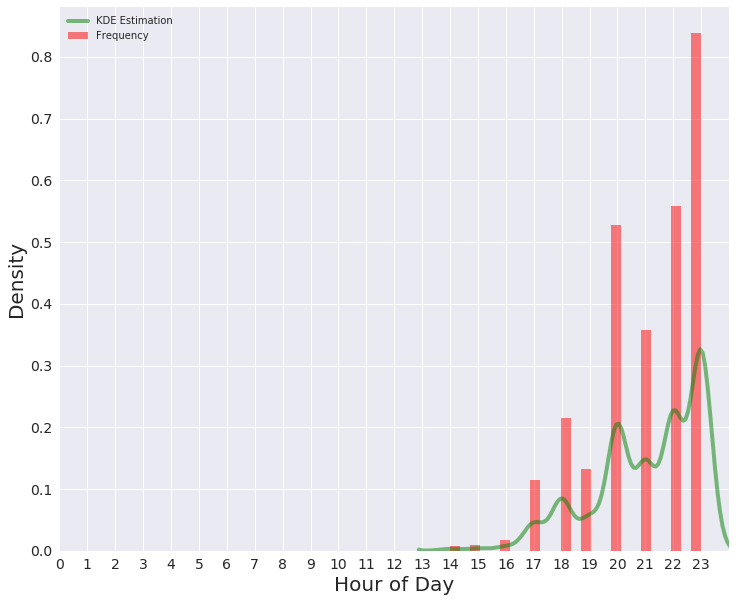

In [25]:
plt.figure(figsize=(12,10))
from scipy.stats import norm
sns.despine()
sns.distplot(threat_logs.Received_Time.dt.hour,kde_kws={"color":"g","lw":4,"label":"KDE Estimation","alpha":0.5},
            hist_kws={"color":"r","alpha":0.5,"label":"Frequency"});
plt.xlim(0,24)
plt.xticks(np.arange(0,24),size=14)
plt.yticks(size=14)
plt.ylabel("Density",rotation=90, size=20)
plt.xlabel("Hour of Day",size=20)
plt.show()

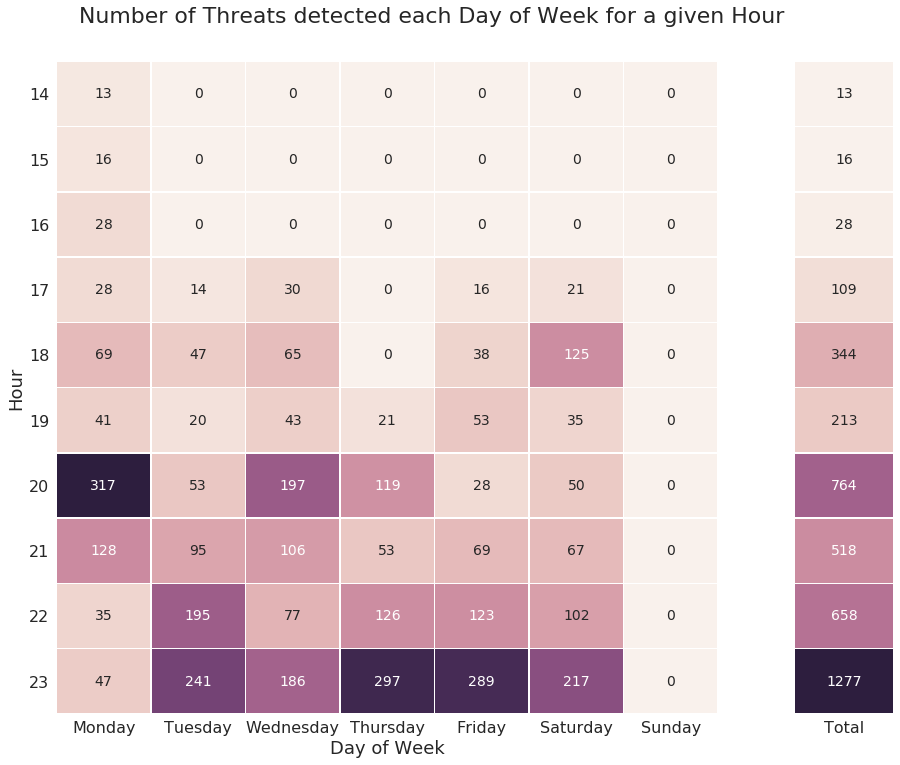

In [26]:
dmap={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
threat_logs['day_of_week']=threat_logs.Received_Time.dt.dayofweek.map(dmap)
x=threat_logs.copy()
x.set_index(threat_logs.day_of_week,inplace=True,drop=True)
x['Hour']=x.Received_Time.dt.hour
x.Hour.fillna(value=0,inplace=True)

a=x.Hour.groupby(level='day_of_week').value_counts()
b=a.unstack(level=-1)
c = b.reindex(index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
e=c.transpose()
e.fillna(value=0,inplace=True)
e=e.astype(int)

fig = plt.figure(figsize=(15, 12)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[10, 1.5]) 
ax0 = plt.subplot(gs[0])
sns.heatmap(e,annot=True,fmt='d',linewidths=.5,ax=ax0, cbar=False,annot_kws={"size":14})
ax1 = plt.subplot(gs[1],sharey=ax0)
sns.heatmap(pd.DataFrame(e.sum(axis=1)),annot=True,fmt='d',linewidths=.5,ax=ax1,cbar=False,annot_kws={"size":14})
plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.set_ylabel([]),visible=False)
plt.setp(ax0.yaxis.get_majorticklabels(),rotation=0)
ax0.tick_params(axis='y',labelsize=16)
ax0.tick_params(axis='x',labelsize=16)
ax0.set_ylabel("Hour",size=18)
ax0.set_xlabel("Day of Week",size=18)
ax1.set_xticklabels(["Total"],size=16)
ax0.set_title("Number of Threats detected each Day of Week for a given Hour",size=22,loc="right",y=1.05,x=1.1)

plt.show()

In [27]:
a=x.Detailed_Subtype.groupby(level='day_of_week').value_counts()
b=a.unstack(level=-1)
c = b.reindex(index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
e=c.transpose()
e=e.replace(np.nan,0)
e=e.astype(int)
day_incident_type=pd.DataFrame([e.idxmax(axis=1),e.max(axis=1)]).transpose()
day_incident_type.columns=['Day','Day_Count']

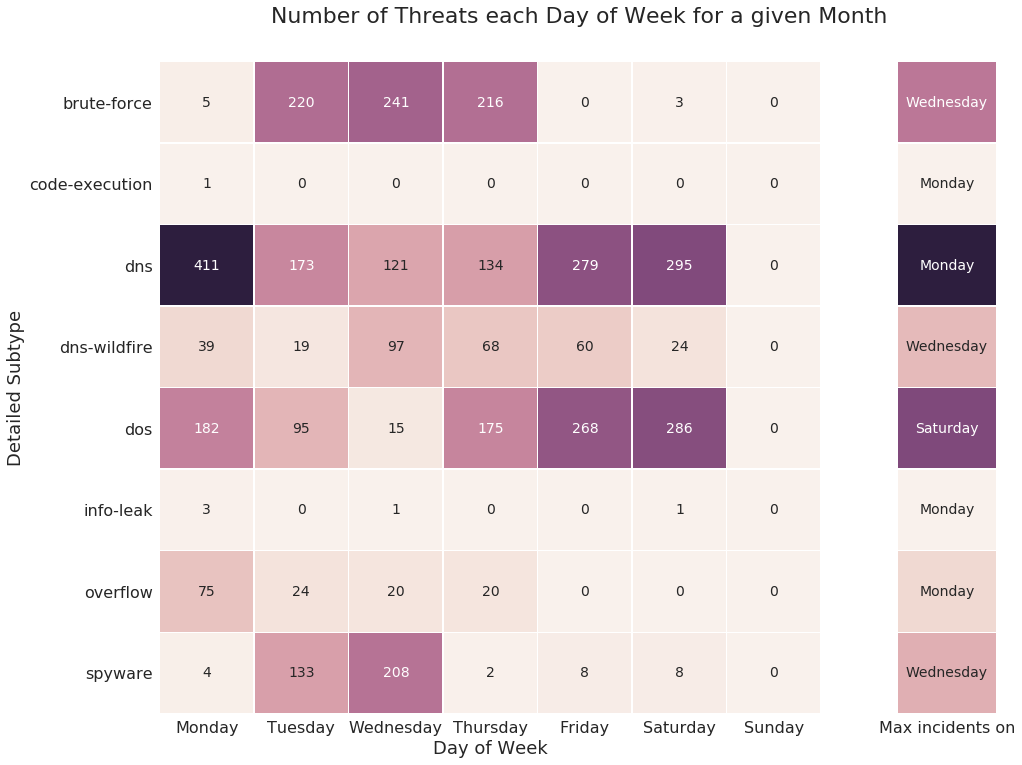

In [28]:
fig = plt.figure(figsize=(15, 12)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[10, 1.5]) 
ax0 = plt.subplot(gs[0])
sns.heatmap(e,annot=True,fmt='d',linewidths=.5,ax=ax0, cbar=False,annot_kws={"size":14})
ax1 = plt.subplot(gs[1],sharey=ax0)
sns.heatmap(pd.DataFrame(e.sum(axis=1)),annot=pd.DataFrame(e.idxmax(axis=1)),fmt='s',linewidths=.5,ax=ax1,cbar=False,annot_kws={"size":14})
plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.set_ylabel([]),visible=False)
plt.setp(ax0.yaxis.get_majorticklabels(),rotation=0,size=12)
ax0.tick_params(axis='y',labelsize=16)
ax0.tick_params(axis='x',labelsize=16)
ax0.set_ylabel("Detailed Subtype",size=18)
ax0.set_xlabel("Day of Week",size=18)
ax1.set_xticklabels(["Max incidents on"],size=16)
ax0.set_title("Number of Threats each Day of Week for a given Month",size=22,loc="right",y=1.05,x=1.1)

plt.show()

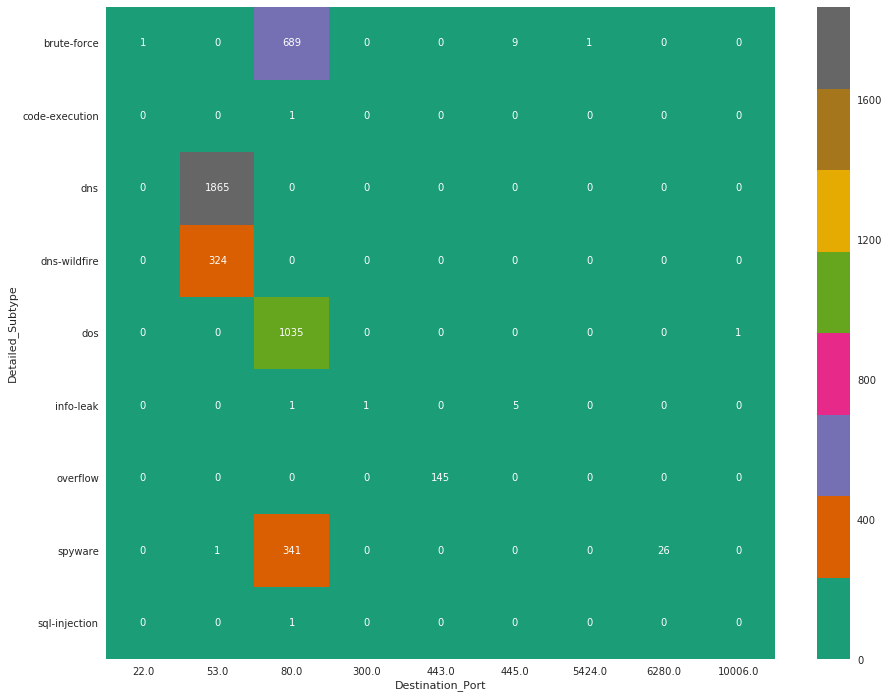

In [57]:
fig = plt.figure(figsize=(15, 12)) 
c=threat_logs.Destination_Port.groupby(threat_logs['Detailed_Subtype']).value_counts().unstack()
c.fillna(value=0,inplace=True)
c=c.astype(int)
sns.heatmap(c,annot=True,fmt='d',cmap='Dark2')
plt.show()

In [29]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')